In [2]:
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

/home/ravisher/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ravisher/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ravisher/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ravisher/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

In [4]:
#1. Load dataset using Keras API
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
#2. split train-test
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
#3. Describe the data
print('Features: ', X_train_full.shape)
print('Target: ', y_train_full.shape)

Features:  (60000, 28, 28)
Target:  (60000,)


In [7]:
# class_names
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

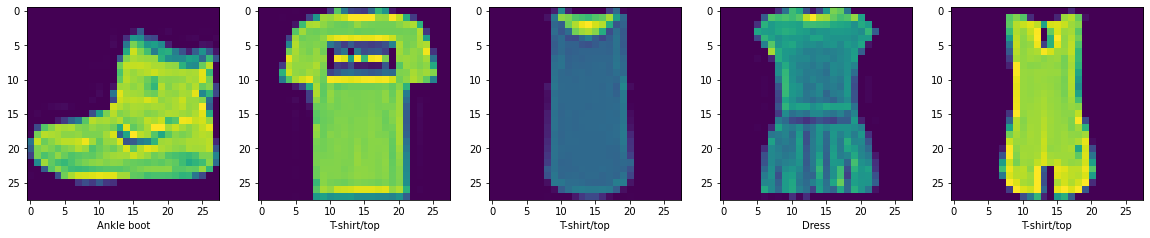

In [8]:
#4. Visualize the data set
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.tight_layout()
for i in range(5):
    image = X_train_full[i]
    plt.subplot(5/5 + 1, 5, i + 1)
    plt.imshow(image)
    plt.xlabel(class_name[y_train_full[i]])
    print()

In [9]:
#5. Scale the input features, since we are going to train the network using Gradient Descent
# we are going to scale down the pixel intensities in range of 0-1 by dividing them with 255.0
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
# Build the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.layers

In [13]:
# access layer parameters
weights, biases = model.layers[1].get_weights()
print("Weights:" , weights)
print("Biases: ", biases)

Weights: [[ 0.05572857  0.04324611 -0.04462049 ...  0.00793976  0.06826401
   0.03622563]
 [-0.04790404  0.03191166 -0.05723617 ... -0.07056333 -0.02528143
   0.06031641]
 [-0.01056317  0.05130161  0.05750518 ... -0.02960144 -0.00672566
  -0.00243189]
 ...
 [ 0.03438419  0.02352355  0.00814627 ... -0.00908288 -0.05101433
   0.03537904]
 [ 0.07153612  0.05065401 -0.00766561 ...  0.03949998  0.05130292
  -0.04385216]
 [-0.01318331  0.04853446 -0.04618194 ... -0.03891045  0.00700594
   0.05618638]]
Biases:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [14]:
# Compiling the model
# keras.losses.sparse_categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [15]:
# Fit/Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 6s 100us/sample - loss: 0.7335 - acc: 0.7601 - val_loss: 0.5067 - val_acc: 0.8254
Epoch 2/20
55000/55000 [==============================] - 5s 97us/sample - loss: 0.4893 - acc: 0.8299 - val_loss: 0.4908 - val_acc: 0.8292
Epoch 3/20
55000/55000 [==============================] - 6s 102us/sample - loss: 0.4425 - acc: 0.8450 - val_loss: 0.4496 - val_acc: 0.8408
Epoch 4/20
55000/55000 [==============================] - 6s 105us/sample - loss: 0.4150 - acc: 0.8548 - val_loss: 0.4427 - val_acc: 0.8422
Epoch 5/20
55000/55000 [==============================] - 6s 108us/sample - loss: 0.3965 - acc: 0.8604 - val_loss: 0.3819 - val_acc: 0.8712
Epoch 6/20
55000/55000 [==============================] - 8s 154us/sample - loss: 0.3808 - acc: 0.8665 - val_loss: 0.3957 - val_acc: 0.8622
Epoch 7/20
55000/55000 [==============================] - 7s 128us/sample - loss: 0.3680 - acc: 0.8693 - val_los

In [16]:
# Save the model
model.save_weights('apparel_classification_model_wieghts.h5')
model.save('apparel_classification_model.h5')

In [18]:
from sklearn.externals import joblib

# Save to file in the current working directory
joblib_file = "joblib_model.pkl"
joblib.dump(history.history, joblib_file)

['joblib_model.pkl']

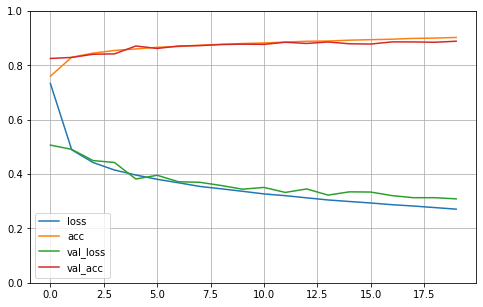

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Set vertical range
plt.show()

In [20]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 52us/sample - loss: 65.0981 - acc: 0.8433


[65.09808918671553, 0.8433]

In [21]:
# Make Predictions using test set
X_predict = X_test[:5]
print(X_predict[0])
y_prediction = model.predict(X_predict)
y_prediction.round(2)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   3   1   0   0   7   0  37   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   2   

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [22]:
# Predict classes
import numpy as np
y_predict_class = model.predict_classes(X_predict)
# wrap around class_name
np.array(class_name)[y_predict_class]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

Using TensorFlow backend.


array(['Bag'], dtype='<U11')

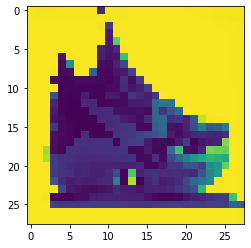

In [23]:
# Predict new images
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
import cv2
from PIL import Image

dataset_dir = os.path.join('/home/ravisher/Development/AI-Lab', 'Dataset')
apparel_dir = os.path.join(dataset_dir, 'Apparels')
files = [file for file in os.listdir(apparel_dir)]
X = []
for file in files:
    img = os.path.join(apparel_dir, file)
    #X.append(cv2.resize(cv2.imread(img), (28, 28), interpolation=cv2.INTER_CUBIC))
    X.append(cv2.resize(cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY), (28,28)))
X = X[0]/255.0
plt.imshow(X)
y_predict_class = model.predict_classes(X.reshape(1, 28,28))
# wrap around class_name
np.array(class_name)[y_predict_class]